# Performance vs. Amount of sample by BigML 

In [3]:
import bigml.api
from bigml.api import BigML
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt

api = BigML()
# api = BigML(storage='./storage')

Building Source

In [4]:
source = api.create_source('Train_Full_New1.csv')
api.ok(source)

True

Building Dataset

In [5]:
dataset = api.create_dataset(source)
api.ok(dataset) 

True

Random Split Building dataset into 80% train and 20% Validation

In [6]:
train_dataset = api.create_dataset(dataset, {"name": "train", "sample_rate": 0.8, "seed": "my seed"})
api.ok(train_dataset)
validation_dataset = api.create_dataset(dataset, {"name": "validation", "sample_rate": 0.8, "seed": "my seed", "out_of_bag": True})
api.ok(validation_dataset)

True

Split Train Dataset by 12.000

In [10]:
#train_dataset1 = api.create_dataset(train_dataset, {"name": "train1", "sample_rate": 0.1, "seed": "my seed"})
train_dataset1b = api.create_dataset(train_dataset, {"name": "train1b", "sample_rate": 0.1, "seed": "my seed","out_of_bag": True})
#train_dataset2 = api.create_dataset(train_dataset1b, {"name": "train2", "sample_rate": 0.12, "seed": "my seed"})
train_dataset2b = api.create_dataset(train_dataset1b, {"name": "train2b", "sample_rate": 0.12, "seed": "my seed","out_of_bag": True})
#train_dataset3 = api.create_dataset(train_dataset2b, {"name": "train3", "sample_rate": 0.13, "seed": "my seed"})
train_dataset3b = api.create_dataset(train_dataset2b, {"name": "train3b", "sample_rate": 0.13, "seed": "my seed","out_of_bag": True})
#train_dataset4 = api.create_dataset(train_dataset3b, {"name": "train4", "sample_rate": 0.15, "seed": "my seed"})
train_dataset4b = api.create_dataset(train_dataset3b, {"name": "train4b", "sample_rate": 0.15, "seed": "my seed","out_of_bag": True})
#train_dataset5 = api.create_dataset(train_dataset4b, {"name": "train5", "sample_rate": 0.17, "seed": "my seed"})
train_dataset5b = api.create_dataset(train_dataset4b, {"name": "train5b", "sample_rate": 0.17, "seed": "my seed","out_of_bag": True})
#train_dataset6 = api.create_dataset(train_dataset5b, {"name": "train6", "sample_rate": 0.21, "seed": "my seed"})
train_dataset6b = api.create_dataset(train_dataset5b, {"name": "train6b", "sample_rate": 0.21, "seed": "my seed","out_of_bag": True})
#train_dataset7 = api.create_dataset(train_dataset6b, {"name": "train7", "sample_rate": 0.26, "seed": "my seed"})
train_dataset7b = api.create_dataset(train_dataset6b, {"name": "train7b", "sample_rate": 0.26, "seed": "my seed","out_of_bag": True})
#train_dataset8 = api.create_dataset(train_dataset7b, {"name": "train8", "sample_rate": 0.35, "seed": "my seed"})
train_dataset8b = api.create_dataset(train_dataset7b, {"name": "train8b", "sample_rate": 0.35, "seed": "my seed","out_of_bag": True})
#train_dataset9 = api.create_dataset(train_dataset8b, {"name": "train9", "sample_rate": 0.45, "seed": "my seed"})
train_dataset9b = api.create_dataset(train_dataset8b, {"name": "train9b", "sample_rate": 0.45, "seed": "my seed","out_of_bag": True})


# Learning curve : Dev set Analysis

      model                                            dataset  Sample  \
1  ensemble  {'code': 201, 'resource': 'dataset/5dc1c1a9e47...   12192   
2  ensemble  {'code': 201, 'resource': 'dataset/5dc1c19be47...   22167   
3  ensemble  {'code': 201, 'resource': 'dataset/5dc1c18e529...   34103   
4  ensemble  {'code': 201, 'resource': 'dataset/5dc1c181781...   46085   
5  ensemble  {'code': 201, 'resource': 'dataset/5dc1c176781...   58335   

   Performance  
1      0.83015  
2      0.84448  
3      0.84698  
4      0.85086  
5      0.85405  


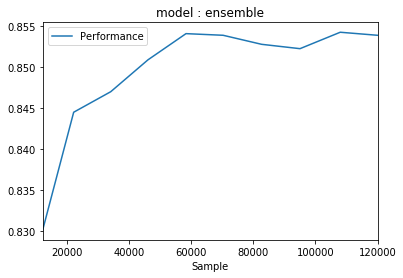

In [11]:
model = "ensemble"

dt_set = [train_dataset9b,
         train_dataset8b,
         train_dataset7b,
         train_dataset6b,
         train_dataset5b,
         train_dataset4b,
         train_dataset3b,
         train_dataset2b,
         train_dataset1b,
         train_dataset] 

Amount = [12192,22167,34103,46085,58335,70283,82685,95040,108000,120000]

res_AmtPer = pd.DataFrame({"model" : model, "dataset" : ['data'], "Sample" : [0], "Performance": [0]})

i=0
for d in dt_set:
    if model == "ensemble":    
        mod = api.create_ensemble(d)
        api.ok(mod)
    if model == "deepnet":
        mod = api.create_deepnet(d)
        api.ok(mod)
        
    evaluation = api.create_evaluation(mod,validation_dataset)
    api.ok(evaluation)
    auc = evaluation['object']['result']['model']['average_area_under_roc_curve']
    res_AmtPer = res_AmtPer.append({"model" : model, "dataset" : dt_set[i], "Sample" :Amount[i], "Performance": auc}, ignore_index = True)
    i=i+1
        
res_AmtPer = res_AmtPer.drop([0],axis =0)
print (res_AmtPer.head(5))
title = "model : " + res_AmtPer ['model'][1]
res_AmtPer.plot(x='Sample' , y='Performance', title = title)

For 2 models

                                             dataset  Sample  Perf_Model1  \
1  {'code': 201, 'resource': 'dataset/5dc1c1a9e47...   12192      0.82632   
2  {'code': 201, 'resource': 'dataset/5dc1c19be47...   22167      0.84326   
3  {'code': 201, 'resource': 'dataset/5dc1c18e529...   34103      0.84712   
4  {'code': 201, 'resource': 'dataset/5dc1c181781...   46085      0.85109   
5  {'code': 201, 'resource': 'dataset/5dc1c176781...   58335      0.85037   

   Perf_Model2  
1      0.83781  
2      0.83623  
3      0.83892  
4      0.82846  
5      0.83884  


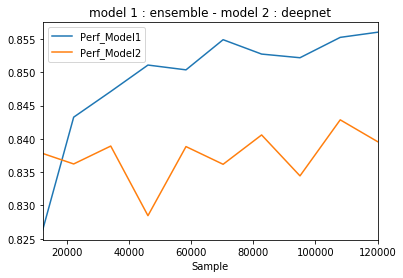

In [12]:
bigml_models = ['ensemble','deepnet']
res_AmtPer = pd.DataFrame({"dataset" : ['data'], "Sample" : [0], "Perf_Model1": [0],"Perf_Model2": [0] })

dt_set = [train_dataset9b,
         train_dataset8b,
         train_dataset7b,
         train_dataset6b,
         train_dataset5b,
         train_dataset4b,
         train_dataset3b,
         train_dataset2b,
         train_dataset1b,
         train_dataset] 

Amount = [12192,22167,34103,46085,58335,70283,82685,95040,108000,120000]


i=0
for d in dt_set:
    # model1 = ensemble     
    mod = api.create_ensemble(d)
    api.ok(mod)
    evaluation = api.create_evaluation(mod,validation_dataset)
    api.ok(evaluation)
    auc_mod1 = evaluation['object']['result']['model']['average_area_under_roc_curve']
    
    # model2 = deeptnet     
    mod = api.create_deepnet(d)
    api.ok(mod)
    evaluation = api.create_evaluation(mod,validation_dataset)
    api.ok(evaluation)
    auc_mod2 = evaluation['object']['result']['model']['average_area_under_roc_curve']
    
    res_AmtPer = res_AmtPer.append({"dataset" : dt_set[i], "Sample" :Amount[i], "Perf_Model1": auc_mod1, "Perf_Model2": auc_mod2}, ignore_index = True)
    i=i+1
        
res_AmtPer = res_AmtPer.drop([0],axis =0)
print (res_AmtPer.head(5))

title = "model 1 : " + bigml_models [0] + " - model 2 : " + bigml_models [1] 
res_AmtPer.plot(x='Sample' , y=['Perf_Model1','Perf_Model2'], title = title)


In [2]:
res_AmtPer.to_csv('lc-ar2.csv')

NameError: name 'res_AmtPer' is not defined

# Learning curve : Train vs. Dev set Analysis

In [20]:
model = "deepnet"

dt_set = [train_dataset9b,
         train_dataset8b,
         train_dataset7b,
         train_dataset6b,
         train_dataset5b,
         train_dataset4b,
         train_dataset3b,
         train_dataset2b,
         train_dataset1b,
         train_dataset] 

Amount = [12192,22167,34103,46085,58335,70283,82685,95040,108000,120000]

res_AmtPer = pd.DataFrame({"model" : model, "dataset" : ['data'], "Sample" : [0], "Performance Dev": [0], "Performance Train": [0]})

i=0
for d in dt_set:
    if model == "ensemble":    
        mod = api.create_ensemble(d)
        api.ok(mod)
    if model == "deepnet":
        mod = api.create_deepnet(d)
        api.ok(mod)
    
    #dev auc    
    evaluation = api.create_evaluation(mod,validation_dataset)
    api.ok(evaluation)
    auc_dev = evaluation['object']['result']['model']['average_area_under_roc_curve']
    
    #rain auc
    evaluation = api.create_evaluation(mod,d)
    api.ok(evaluation)
    auc_train = evaluation['object']['result']['model']['average_area_under_roc_curve']
    
    
    res_AmtPer = res_AmtPer.append({"model" : model, "dataset" : dt_set[i], "Sample" :Amount[i], "Performance Dev": auc_dev, "Performance Train": auc_train}, ignore_index = True)
    i=i+1
        
res_AmtPer = res_AmtPer.drop([0],axis =0)
print (res_AmtPer.head(5))


      model                                            dataset  Sample  \
1  ensemble  {'code': 201, 'resource': 'dataset/5dc01d06529...   12192   
2  ensemble  {'code': 201, 'resource': 'dataset/5dc01cf8e47...   22167   
3  ensemble  {'code': 201, 'resource': 'dataset/5dc01cefe47...   34103   
4  ensemble  {'code': 201, 'resource': 'dataset/5dc01c5f781...   46085   
5  ensemble  {'code': 201, 'resource': 'dataset/5dc01c54e47...   58335   

   Performance Dev  Performance Train  
1          0.82998            0.95918  
2          0.84236            0.92413  
3          0.84838            0.90552  
4          0.85189            0.89811  
5          0.85400            0.89097  


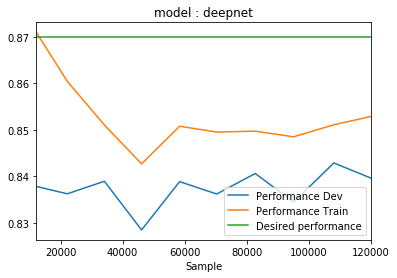

In [15]:
title = "model : " + res_AmtPer ['model'][1]
res_AmtPer['Desired performance'] = 0.87
res_AmtPer.plot(x='Sample' , y=['Performance Dev','Performance Train','Desired performance'], title = title)

In [18]:
model = "ensemble"

dt_set = [train_dataset9b,
         train_dataset8b,
         train_dataset7b,
         train_dataset6b,
         train_dataset5b,
         train_dataset4b,
         train_dataset3b,
         train_dataset2b,
         train_dataset1b,
         train_dataset] 

Amount = [12192,22167,34103,46085,58335,70283,82685,95040,108000,120000]

res_AmtPer = pd.DataFrame({"model" : model, "dataset" : ['data'], "Sample" : [0], "Performance Dev": [0], "Performance Train": [0]})

i=0
for d in dt_set:
    if model == "ensemble":    
        mod = api.create_ensemble(d)
        api.ok(mod)
    if model == "deepnet":
        mod = api.create_deepnet(d)
        api.ok(mod)
    
    #dev auc    
    evaluation = api.create_evaluation(mod,validation_dataset)
    api.ok(evaluation)
    auc_dev = evaluation['object']['result']['model']['average_area_under_roc_curve']
    
    #rain auc
    evaluation = api.create_evaluation(mod,d)
    api.ok(evaluation)
    auc_train = evaluation['object']['result']['model']['average_area_under_roc_curve']
    
    
    res_AmtPer = res_AmtPer.append({"model" : model, "dataset" : dt_set[i], "Sample" :Amount[i], "Performance Dev": auc_dev, "Performance Train": auc_train}, ignore_index = True)
    i=i+1
        
res_AmtPer = res_AmtPer.drop([0],axis =0)
print (res_AmtPer.head(5))

     model                                            dataset  Sample  \
1  deepnet  {'code': 201, 'resource': 'dataset/5dc01d06529...   12192   
2  deepnet  {'code': 201, 'resource': 'dataset/5dc01cf8e47...   22167   
3  deepnet  {'code': 201, 'resource': 'dataset/5dc01cefe47...   34103   
4  deepnet  {'code': 201, 'resource': 'dataset/5dc01c5f781...   46085   
5  deepnet  {'code': 201, 'resource': 'dataset/5dc01c54e47...   58335   

   Performance Dev  Performance Train  
1          0.83781            0.87097  
2          0.83623            0.86041  
3          0.83892            0.85103  
4          0.82846            0.84267  
5          0.83884            0.85076  


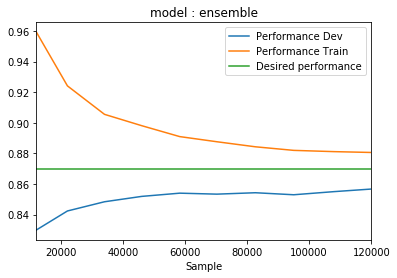

In [21]:
title = "model : " + res_AmtPer ['model'][1]
res_AmtPer['Desired performance'] = 0.87
res_AmtPer.plot(x='Sample' , y=['Performance Dev','Performance Train','Desired performance'], title = title)